In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Customers dataset:")
print(customers.info())

Customers dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [4]:
print("\nProducts dataset:")
print(products.info())


Products dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [5]:
print("\nTransactions dataset:")
print(transactions.info())


Transactions dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [6]:
print("\nMissing values in the data:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing values in the data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print("\nDuplicate rows:")
print(f"Customers: {customers.duplicated().sum()} duplicates")
print(f"Products: {products.duplicated().sum()} duplicates")
print(f"Transactions: {transactions.duplicated().sum()} duplicates")


Duplicate rows:
Customers: 0 duplicates
Products: 0 duplicates
Transactions: 0 duplicates


In [8]:
merge_data = transactions.merge(customers, on='CustomerID', how='left')
merge_data = merge_data.merge(products, on='ProductID', how='left')

In [10]:
print("\nMerged dataset:")
print(merge_data.head())


Merged dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

In [11]:
merge_data['TransactionDate'] = pd.to_datetime(merge_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [12]:
merge_data['Year'] = merge_data['TransactionDate'].dt.year
merge_data['Month'] = merge_data['TransactionDate'].dt.month
customer_lifetime_value = merge_data.groupby('CustomerID')['TotalValue'].sum()

In [13]:
merge_data.describe()

,TransactionDate,Quantity,TotalValue,Price_x,Price_y,Year,Month
count,1000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,272.55407,2023.996000,6.288000
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,16.08000,2023.000000,1.000000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,147.95000,2024.000000,3.000000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,299.93000,2024.000000,6.000000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,404.40000,2024.000000,9.000000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,497.76000,2024.000000,12.000000
std,NaN,1.117981,493.144478,140.73639,140.73639,0.063151,3.437859


In [14]:
top_products = merge_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop-performing products:")
print(top_products)


Top-performing products:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [15]:
region_revenue = merge_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRegion-wise revenue:")
print(region_revenue)


Region-wise revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


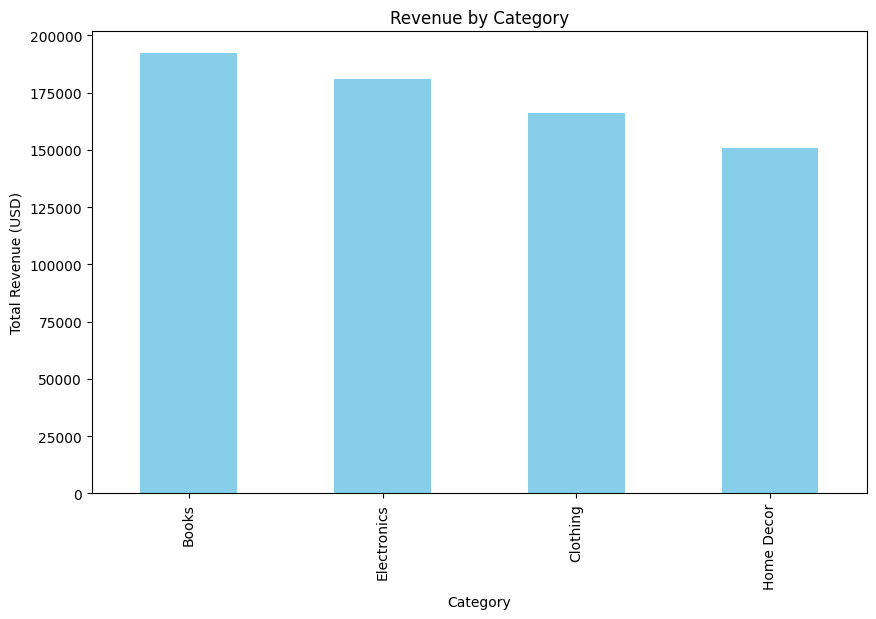

In [17]:
# Revenue by category
plt.figure(figsize=(10, 6))
category_revenue = merge_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()

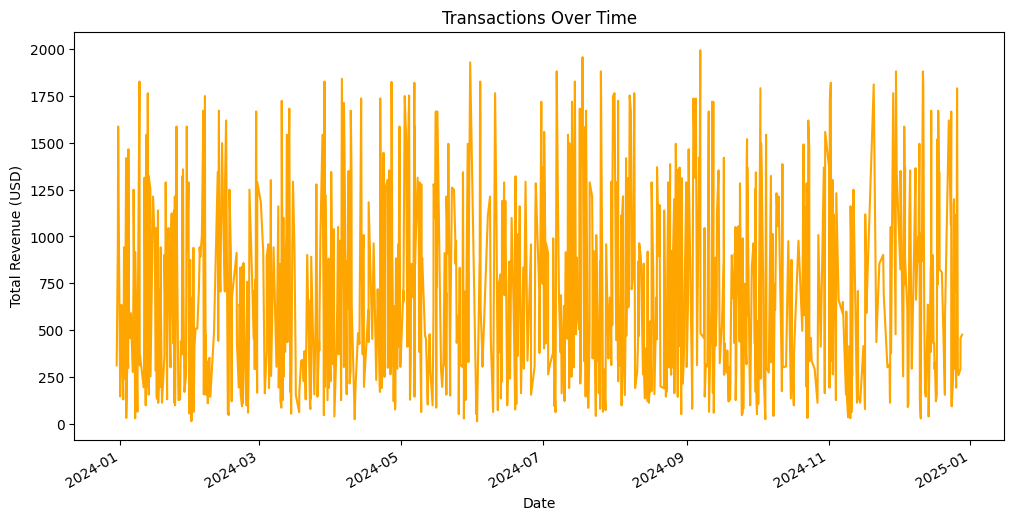

In [19]:
# Transactions over time
plt.figure(figsize=(12, 6))
transactions_over_time = merge_data.groupby('TransactionDate')['TotalValue'].sum()
transactions_over_time.plot(color='orange')
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue (USD)')
plt.show()

<ipython-input-20-547ff5e7b62b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


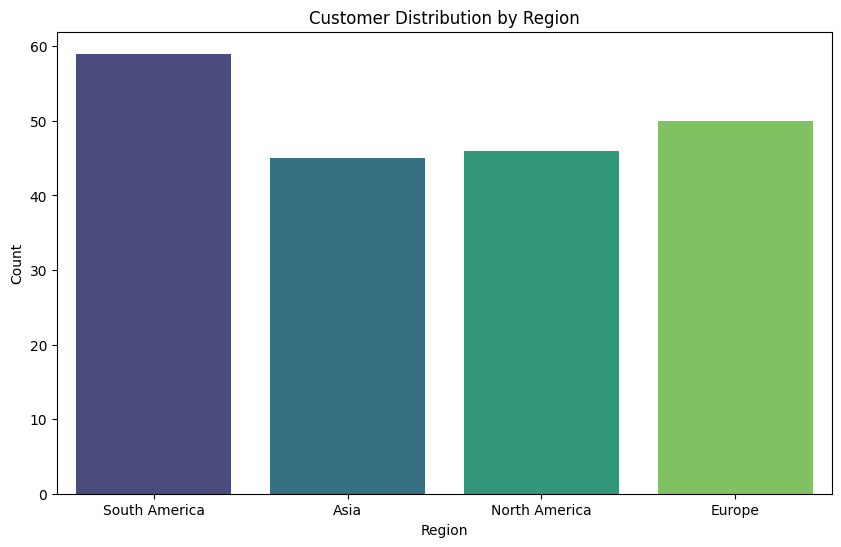

In [20]:
# Customer distribution by region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

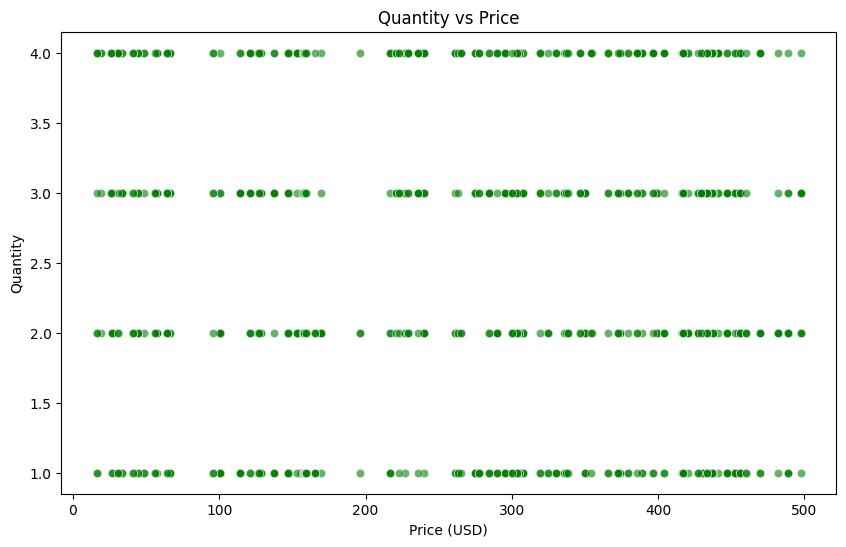

In [24]:
# Quantity vs Product Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merge_data, x='Price_y', y='Quantity', alpha=0.6, color='green')
plt.title('Quantity vs Price')
plt.xlabel('Price (USD)')
plt.ylabel('Quantity')
plt.show()

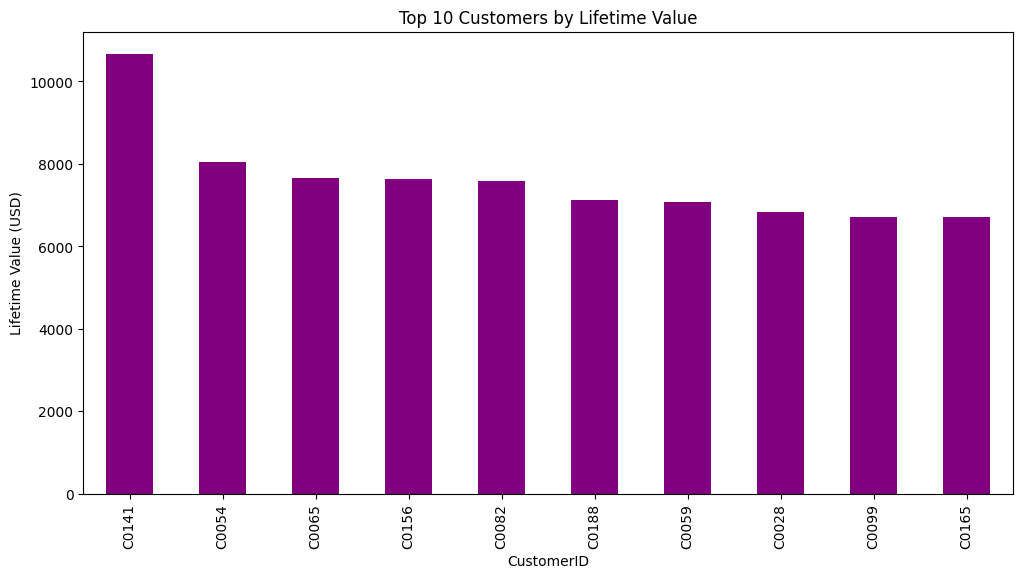

In [25]:
# Top customers by lifetime value
plt.figure(figsize=(12, 6))
top_customers = customer_lifetime_value.sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('CustomerID')
plt.ylabel('Lifetime Value (USD)')
plt.show()

In [27]:
# Save cleaned and merged dataset
merge_data.to_csv('MergedData.csv', index=False)